# Comparison of model predictions and TLM targets with NFI plots

In [9]:
import sys
import os

project_dir = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(project_dir)

import numpy as np
from utils import my_confusion_matrix
from utils.viz_utils import *

In [10]:
# define constants

class_names = ['NF', 'OF', 'CF', 'SF']
class_names_pof = ['NF', 'F']
class_names_ft = ['OF', 'CF', 'SF']

n_targets = len(class_names)
to_ft = np.full(shape=256, fill_value=-1)
to_ft[:4] = np.array([-1, 0, 1, 2]) # array to convert 4-classes labels/predictions to forest type
to_pof = np.full(shape=256, fill_value=-1)
to_pof[:4] = np.array([0, 1, 1, 1]) # array to convert 4-classes labels/predictions to presence of forest
n_targets_ft = len(class_names_ft)
n_targets_pof = len(class_names_pof)

In [11]:
def plot_NFI_cms(fn, fn_ft=None, xlabel='predicted label'):
    """loads samples from a label source and NFI plots from a .npy file, and computes and displays confusion matrices"""
    ylabel = 'NFI label'
    count_figsize=(2, 1.6)
    pts = np.load(fn)
    NFI_pts, pred_pts = pts
    cm = my_confusion_matrix(NFI_pts, pred_pts, n_targets=n_targets)
    print('overall: {} valid samples'.format(np.sum(cm)))
    display_count_cm(cm, class_names=class_names, xlabel=xlabel, ylabel=ylabel, figsize=count_figsize)
    display_norm_cm(cm, class_names=class_names, xlabel=xlabel, ylabel=ylabel)
    # forest type
    if fn_ft is None:
        ft_NFI_pts = to_ft[NFI_pts]
        ft_pred_pts = to_ft[pred_pts]
    else:
        ft_NFI_pts, ft_pred_pts = np.load(fn_ft)
    cm_ft = my_confusion_matrix(ft_NFI_pts, ft_pred_pts, n_targets=n_targets_ft)
    print('forest type: {} valid samples'.format(np.sum(cm_ft)))
    display_count_cm(cm_ft, class_names=class_names_ft, xlabel=xlabel, ylabel=ylabel, figsize=count_figsize)
    display_norm_cm(cm_ft, class_names=class_names_ft, xlabel=xlabel, ylabel=ylabel)
    # presence of forest
    pof_NFI_pts = to_pof[NFI_pts]
    pof_pred_pts = to_pof[pred_pts]
    cm_pof = my_confusion_matrix(pof_NFI_pts, pof_pred_pts, n_targets=n_targets_pof)
    print('presence of forest: {} valid samples'.format(np.sum(cm_pof)))
    display_count_cm(cm_pof, class_names=class_names_pof, xlabel=xlabel, ylabel=ylabel, figsize=count_figsize)
    display_norm_cm(cm_pof, class_names=class_names_pof, xlabel=xlabel, ylabel=ylabel)
    

# TLM

overall: 321 valid samples
forest type: 90 valid samples
presence of forest: 321 valid samples


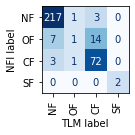

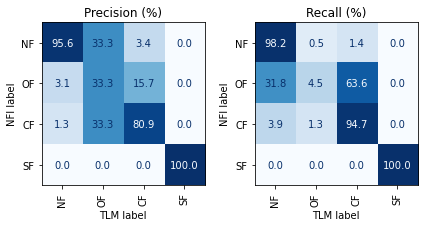

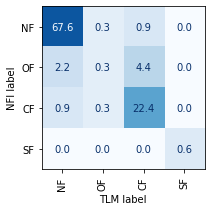

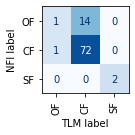

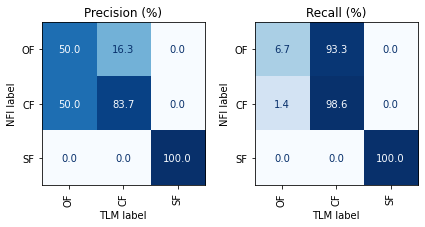

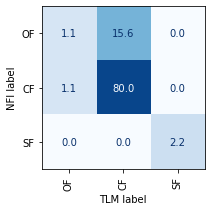

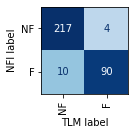

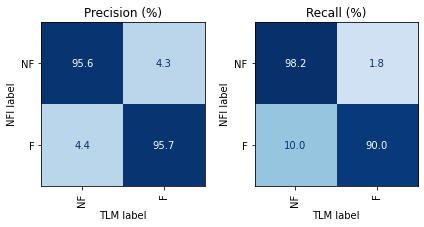

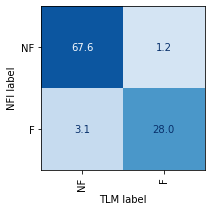

In [12]:
fn = os.path.join(project_dir, 'output/TLM_analysis/NFI_comparison_pts.npy')
plot_NFI_cms(fn, fn_ft=None, xlabel='TLM label')


# BB model

overall: 321 valid samples
forest type: 93 valid samples
presence of forest: 321 valid samples


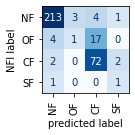

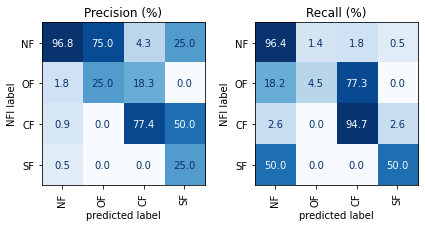

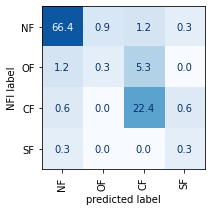

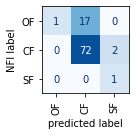

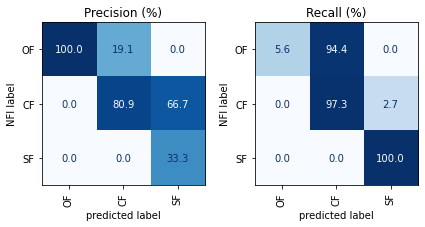

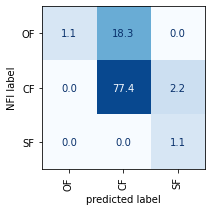

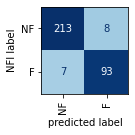

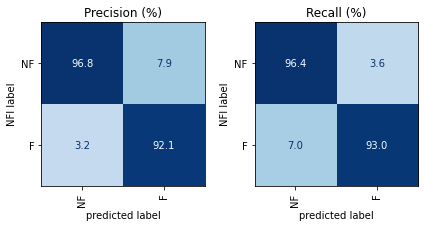

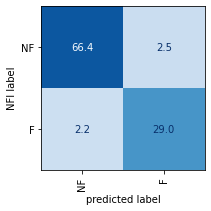

In [13]:
fn = os.path.join(
        project_dir, 
        'output/bb_hierarchical/inference/epoch_19/test_with_context/NFI_comparison_pts.npy')
plot_NFI_cms(fn, fn_ft=None)

# SB model

overall: 321 valid samples
forest type: 96 valid samples
presence of forest: 321 valid samples


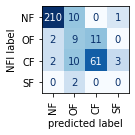

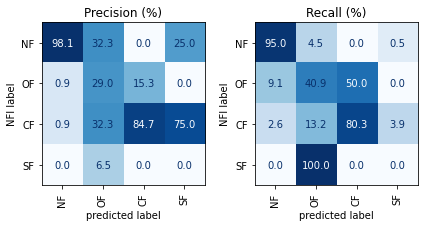

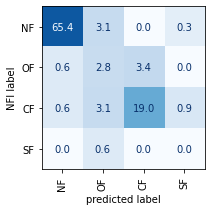

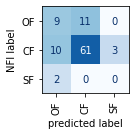

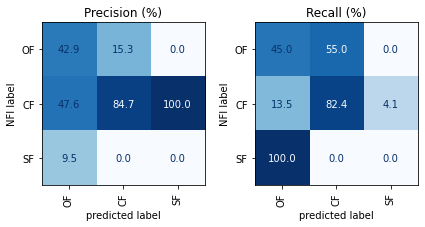

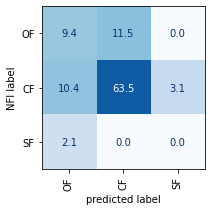

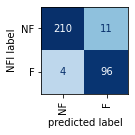

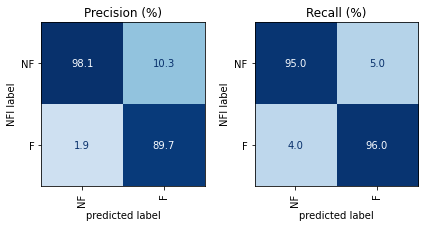

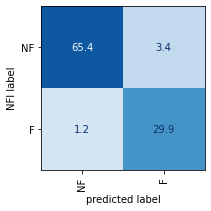

In [14]:
fn = os.path.join(
    project_dir, 
    'output/sb_hierarchical_MSElog1em1_MSE_doubling_negatives/inference/epoch_19/test_with_context/NFI_comparison_pts.npy')
plot_NFI_cms(fn, fn_ft=None)